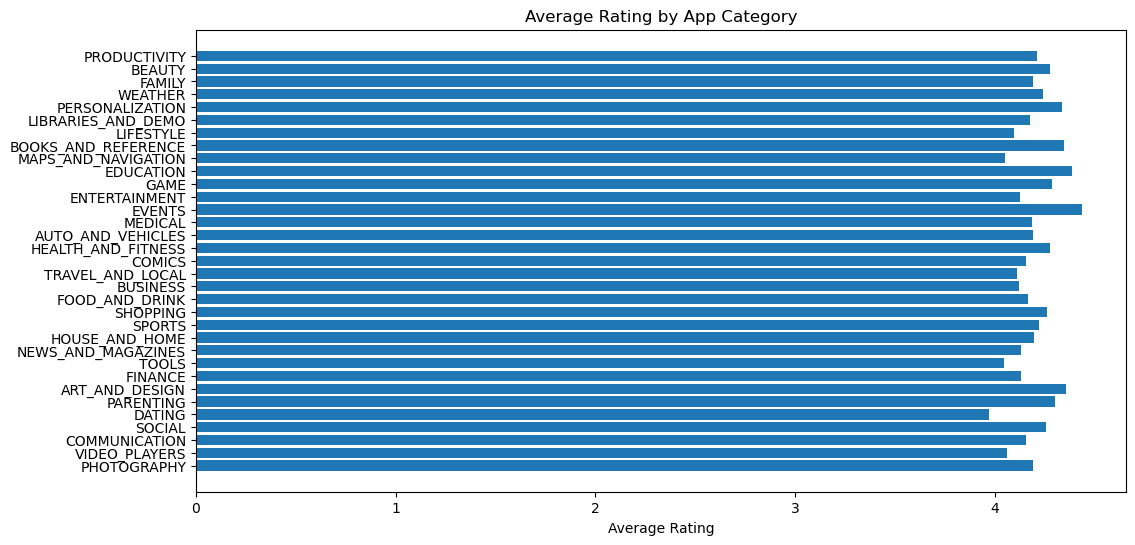

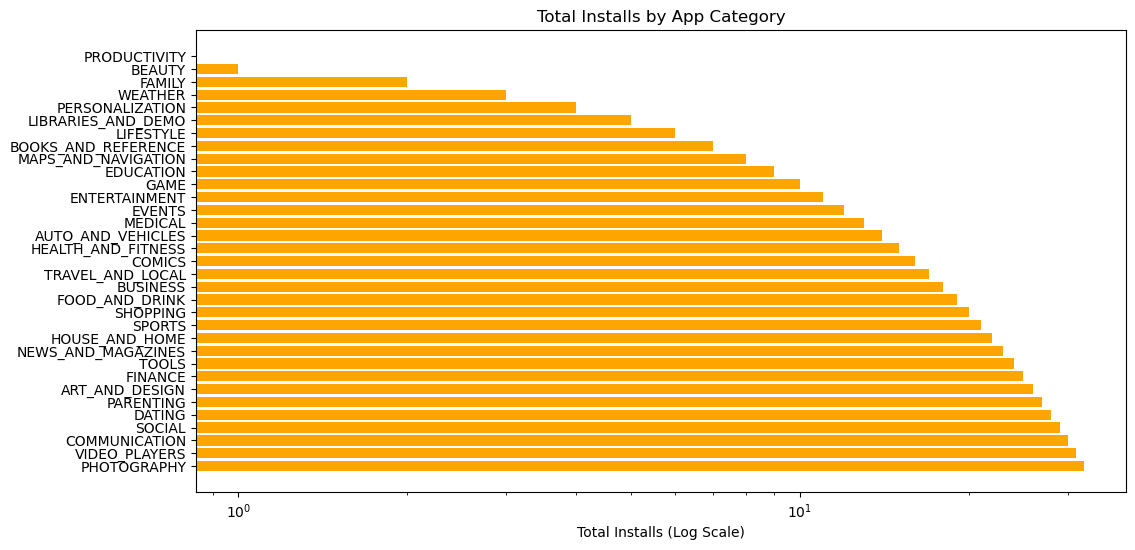

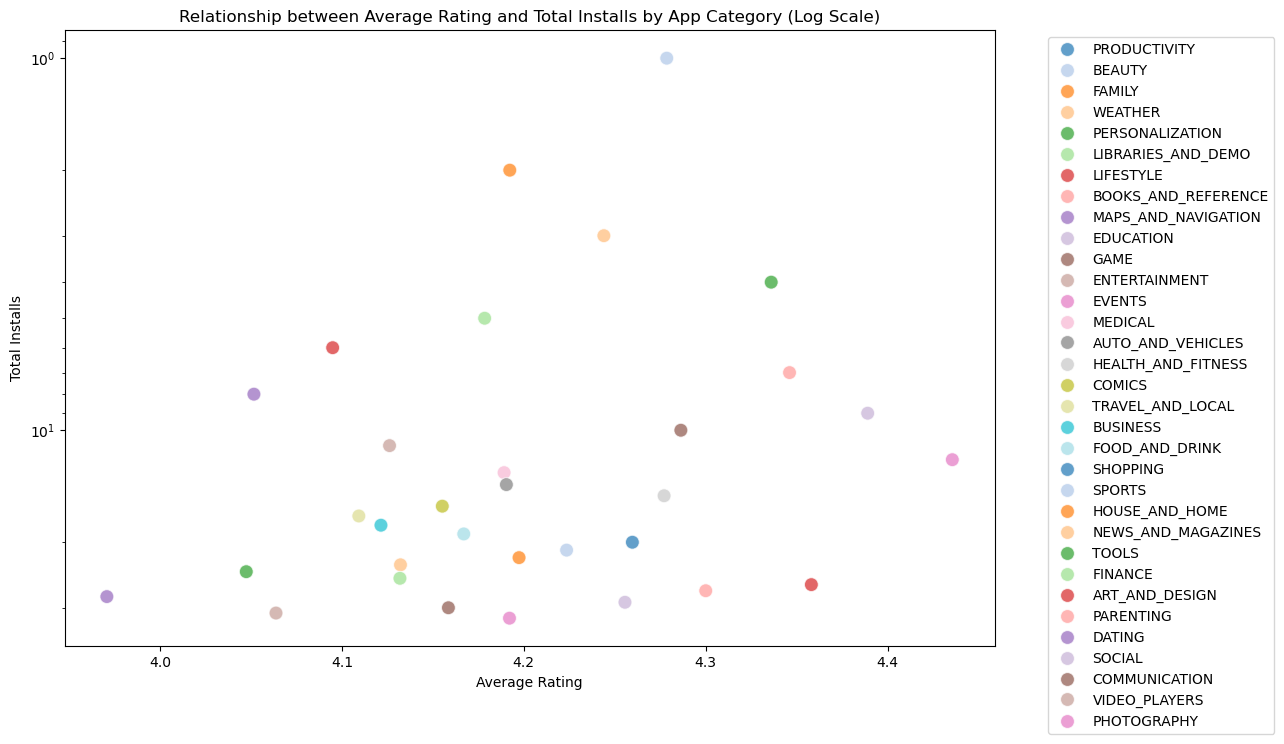

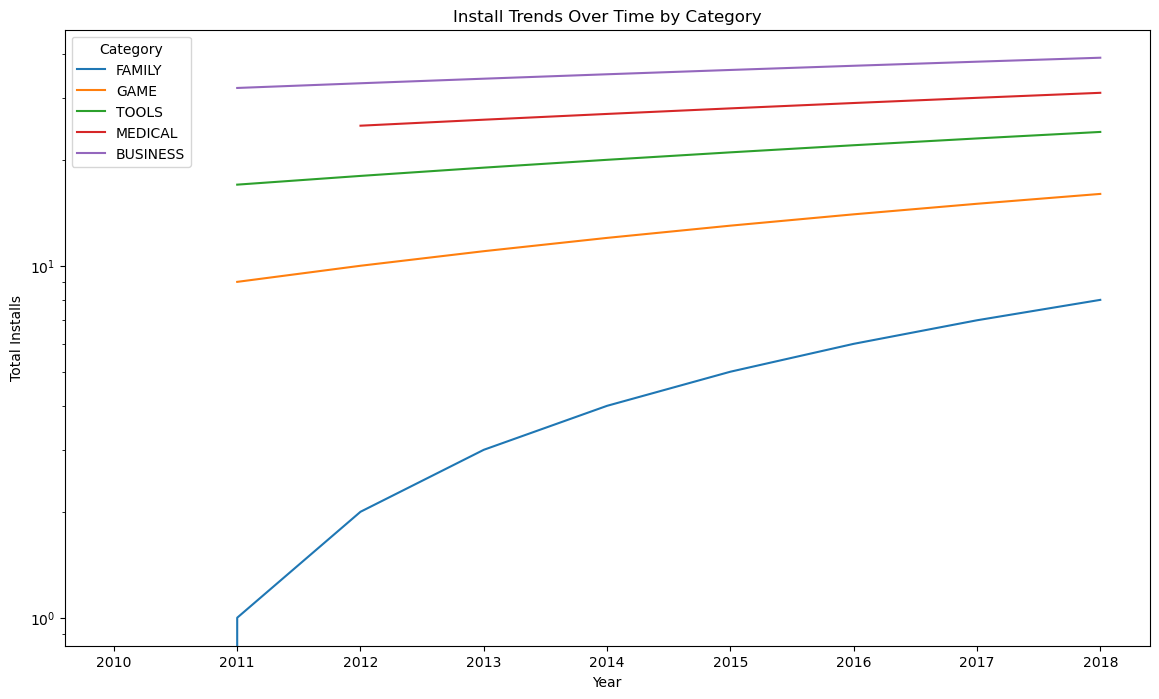

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset.
data = pd.read_csv('googleplaystoremaster.csv')

# Prepare data for analysis
category_rating_installs = data.groupby('Category').agg({
    'Rating': 'mean',
    'Installs': 'sum'
}).reset_index().sort_values(by='Installs', ascending=False)

# Define the list of valid categories based on known unique values in the dataset
valid_categories = [
    'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
    'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
    'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS',
    'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY',
    'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
    'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
    'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'
]

# Filter the dataset to retain only rows with valid category names
data = data[data['Category'].isin(valid_categories)]

# Confirm that the '1.9' or any other anomalies are removed
("Unique categories after filtering:", data['Category'].unique())


# Plot 1: Average Rating by App Category
plt.figure(figsize=(12, 6))
plt.barh(category_rating_installs['Category'], category_rating_installs['Rating'])
plt.xlabel('Average Rating')
plt.title('Average Rating by App Category')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()

# Plot 2: Total Installs by App Category (Log Scale)
plt.figure(figsize=(12, 6))
plt.barh(category_rating_installs['Category'], category_rating_installs['Installs'], color='orange')
plt.xscale('log')  # Apply log scale to x-axis for handling large install values
plt.xlabel('Total Installs (Log Scale)')
plt.title('Total Installs by App Category')
plt.gca().invert_yaxis()  # Invert y-axis for readability
plt.show()

# Plot 3: Scatter Plot with Color-Coding and Log Scale for Ratings vs Installs by Category
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=category_rating_installs,
    x='Rating',
    y='Installs',
    hue='Category',
    palette='tab20',
    s=100,
    alpha=0.7
)

# Customize plot appearance
plt.yscale('log')  # Apply log scale to y-axis to handle large range of install values
plt.title('Relationship between Average Rating and Total Installs by App Category (Log Scale)')
plt.xlabel('Average Rating')
plt.ylabel('Total Installs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Position legend on the right side
plt.show()

# Plot 4: Install Trends Over Time by Category (Line Graph)
# Select a subset of categories to illustrate install trends over time for clarity in the visualization
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')  # Ensure 'Last Updated' is datetime
data['Year'] = data['Last Updated'].dt.year  # Extract year from 'Last Updated'
top_categories = data['Category'].value_counts().index[:5]  # Top 5 categories by frequency
install_trends = data[data['Category'].isin(top_categories)].groupby(['Year', 'Category']).agg({
    'Installs': 'sum'
}).reset_index()

# Plotting the line graph to show install trends over time for selected categories
plt.figure(figsize=(14, 8))
for category in top_categories:
    subset = install_trends[install_trends['Category'] == category]
    plt.plot(subset['Year'], subset['Installs'], label=category)

plt.title("Install Trends Over Time by Category")
plt.xlabel("Year")
plt.ylabel("Total Installs")
plt.yscale('log')  # Apply log scale for readability
plt.legend(title="Category")
plt.show()
